Semi-Supervised task using SimClr

Importing data from kaggle

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d jessicali9530/stl10

100% 1.88G/1.88G [00:17<00:00, 40.4MB/s]
100% 1.88G/1.88G [00:17<00:00, 117MB/s] 


In [ ]:
! kaggle datasets download -d pratt3000/stl10-binary-files

100% 2.43G/2.44G [01:07<00:00, 40.6MB/s]
100% 2.44G/2.44G [01:07<00:00, 38.9MB/s]


In [ ]:
! unzip stl10.zip
! unzip stl10-binary-files.zip

Streaming output truncated to the last 5000 lines.
  inflating: unlabeled_images/unlabeled_image_png_95505.png  
  inflating: unlabeled_images/unlabeled_image_png_95506.png  
  inflating: unlabeled_images/unlabeled_image_png_95507.png  
  inflating: unlabeled_images/unlabeled_image_png_95508.png  
  inflating: unlabeled_images/unlabeled_image_png_95509.png  
  inflating: unlabeled_images/unlabeled_image_png_9551.png  
  inflating: unlabeled_images/unlabeled_image_png_95510.png  
  inflating: unlabeled_images/unlabeled_image_png_95511.png  
  inflating: unlabeled_images/unlabeled_image_png_95512.png  
  inflating: unlabeled_images/unlabeled_image_png_95513.png  
  inflating: unlabeled_images/unlabeled_image_png_95514.png  
  inflating: unlabeled_images/unlabeled_image_png_95515.png  
  inflating: unlabeled_images/unlabeled_image_png_95516.png  
  inflating: unlabeled_images/unlabeled_image_png_95517.png  
  inflating: unlabeled_images/unlabeled_image_png_95518.png  
  inflating: unlabel

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
!ls

drive	     stl10_binary	     test_images
kaggle.json  stl10-binary-files.zip  train_images
sample_data  stl10.zip		     unlabeled_images


In [ ]:
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from imageio import imsave
from tqdm import tqdm
import random
import shutil

HEIGHT = 96
WIDTH = 96
DEPTH = 3

SIZE = HEIGHT * WIDTH * DEPTH

DATA_DIR = './'
# DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

TRAIN_DATA_PATH = '/content/stl10_binary/train_X.bin'
TRAIN_LABEL_PATH = '/content/stl10_binary/train_y.bin'

TEST_DATA_PATH = '/content/stl10_binary/test_X.bin'
TEST_LABEL_PATH = '/content/stl10_binary/test_y.bin'

UNLAB_DATA_PATH = '/content/stl10_binary/unlabeled_X.bin'

In [ ]:
def read_single_image(image_file):

  image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)

  image = np.reshape(image, (3, 96, 96))
  image = np.transpose(image, (2, 1, 0))
  return image

def plot_image(image):
  
  plt.imshow(image)
  plt.show()

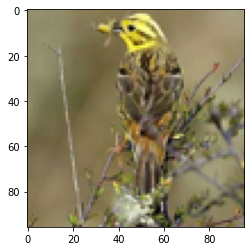

In [ ]:
with open(TRAIN_DATA_PATH) as f:
  image = read_single_image(f)
  plot_image(image)

Saving and reading images and their labels


In [ ]:
def read_labels(path_to_labels):

    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_all_images(path_to_data):

    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)

        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def save_images(images, labels, types):
    i = 0
    for image in tqdm(images, position=0):
        label = labels[i] 
        directory = DATA_DIR + '/' + types + '/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        #print(filename)
        save_image(image, filename)
        i = i+1
        
def save_unlabelled_images(images):
    i = 0
    for image in tqdm(images, position=0):
        directory = DATA_DIR + '/' + 'unlabelled' + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        save_image(image, filename)
        i = i+1 
        

def create_val_dataset():
    train_image_path = DATA_DIR + "train"
    folders = os.listdir(train_image_path)

    for folder in tqdm(folders, position=0):
        temp_dir = DATA_DIR +"/train/" + folder
        temp_image_list = os.listdir(temp_dir)

    for i in range(50):
        val_dir = DATA_DIR + "/val/" + folder
        try:
            os.makedirs(val_dir, exist_ok=True)
        except OSError as exc:

            if exc.errno == errno.EEXIST:
                pass
        image_name = random.choice(temp_image_list)
        temp_image_list.remove(image_name)
        old_name = temp_dir + '/' + image_name
        new_name = val_dir + '/' + image_name
        os.replace(old_name, new_name)

In [ ]:
train_labels = read_labels(TRAIN_LABEL_PATH)
train_images = read_all_images(TRAIN_DATA_PATH)

test_labels = read_labels(TEST_LABEL_PATH)
test_images = read_all_images(TEST_DATA_PATH)

unlabelled_images = read_all_images(UNLAB_DATA_PATH)

In [ ]:
save_images(train_images, train_labels, "train")
save_images(test_images, test_labels, "test")
save_unlabelled_images(unlabelled_images)

100%|██████████| 100000/100000 [06:31<00:00, 255.55it/s]


Supervised baseline

In [ ]:
import keras
from keras import layers
image_size = 96
image_channels = 3
width = 128
def get_encoder():
    return keras.Sequential(
        [
            keras.Input(shape=(image_size, image_size, image_channels)),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Flatten(),
            layers.Dense(width, activation="relu"),
        ],
        name="encoder",
    )
model = keras.Sequential(
    [
        keras.Input(shape=(image_size, image_size, image_channels)),
#         get_augmenter(**classification_augmentation),
        get_encoder(),
        keras.layers.Dense(11),
    ],
    name="baseline_model",
)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

baseline_history = model.fit(
    x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels)
)


Epoch 1/10
157/157 [==============================] - 125s 698ms/step - loss: 3.9522 - acc: 0.2050 - val_loss: 1.7381 - val_acc: 0.3515
Epoch 2/10
157/157 [==============================] - 108s 689ms/step - loss: 1.5876 - acc: 0.4046 - val_loss: 1.5063 - val_acc: 0.4261
Epoch 3/10
157/157 [==============================] - 109s 697ms/step - loss: 1.3428 - acc: 0.4946 - val_loss: 1.5584 - val_acc: 0.4523
Epoch 4/10
157/157 [==============================] - 108s 690ms/step - loss: 1.0870 - acc: 0.5959 - val_loss: 1.6850 - val_acc: 0.4275
Epoch 5/10
157/157 [==============================] - 109s 693ms/step - loss: 0.8304 - acc: 0.7038 - val_loss: 1.8615 - val_acc: 0.4615
Epoch 6/10
157/157 [==============================] - 109s 697ms/step - loss: 0.6041 - acc: 0.7844 - val_loss: 2.0293 - val_acc: 0.4391
Epoch 7/10
157/157 [==============================] - 109s 696ms/step - loss: 0.5185 - acc: 0.8178 - val_loss: 2.1072 - val_acc: 0.4486
Epoch 8/10
157/157 [============================

Pseudo-labelling 

In [ ]:
import tensorflow as tf 
import numpy as np
epoch = 30
batch_size = 100
threshold = 0.6
steps = int(unlabelled_images.shape[0]/batch_size)
for idx in range(steps):
        #predicting class
        pseudo_labels = model.predict(unlabelled_images, batch_size=100)
        #taking max and checking for threshold
        pseudo_labels = np.array( [ np.argmax(x) if np.max(x) > threshold else -1 for x in pseudo_labels])
        #zipping their labels and images
        dataset = np.array( [ [x,y] for x,y in zip( unlabelled_images, pseudo_labels ) if y != -1 ])
        x_values = np.array( [x for x,y in dataset ])
        y_values = np.array( [y for x,y in dataset ])
        ]

        pseudo_dataset = tf.data.Dataset.from_tensor_slices((x_values, y_values ))
        pseudo_dataset = pseudo_dataset.shuffle(1000).batch(batch_size)


In [ ]:

model.fit(pseudo_dataset, batch_size=10, epochs=3)

In [ ]:
#fine tuning 
model.fit(x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels))